## Load Libraries

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
import pandas as pd
from fbprophet import Prophet

## Load Data
Datos de ventas de bebidas alcoholicas. Datos mensuales y son las ventas.



In [33]:
df = pd.read_csv('/content/drive/MyDrive/Python-Prophet-K/Libro1111.csv')

In [34]:
df.head()

,tiempo,Tareas Realizadas,Suscriptores,dummy
0,05/07/2021,2,3,1
1,06/07/2021,6,3,1
2,07/07/2021,13,3,1
3,08/07/2021,9,3,1
4,09/07/2021,16,3,1


### Format the Data
Para asgurarnos que los datos sean fechas, esta libreria requiere que los datos esten de una forma especifica, toca llamarlo dfcolumns =['ds', 'y'] se debe cambiar el nombre de las columnas, por defecto prophet utiliza una frecuencia diaria. 
pd.to_datetime: Se transofrman los datos en tipo fecha.

In [36]:
df.columns = ['ds','y', 'suscriptores', 'dummy']

In [37]:
df['ds'] = pd.to_datetime(df['ds'])

## Create and Fit Model


In [38]:
m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


## Pronósticos del futuro

### Paso 1: Crear el dataframe donde colocaremos los resultados
m.make_future_dataframe(periods=24,freq = 'MS')
este método que se llama make_Future_dataframe sobre nuestro modelo m, luego la cantidad de elementos que queremos pronósticar en el futuro, como es mensual colocamos 24, luego especificamos la frecuencia que estamos considerando, porque por defecto estan diario. Aca se cambia a mensual.


In [39]:
future = m.make_future_dataframe(periods=24)

In [40]:
future.head()

,ds
0,2021-01-09
1,2021-02-08
2,2021-02-09
3,2021-03-08
4,2021-03-09


In [41]:
df.head()

,ds,y,suscriptores,dummy
0,2021-05-07,2,3,1
1,2021-06-07,6,3,1
2,2021-07-07,13,3,1
3,2021-08-07,9,3,1
4,2021-09-07,16,3,1


In [42]:
df.tail()

,ds,y,suscriptores,dummy
45,2021-06-08,9,4,0
46,2021-07-08,13,4,0
47,2021-08-08,7,4,0
48,2021-09-08,9,4,0
49,2021-10-08,14,4,0


En futuroesta todo el pasado mas lo dos a nos adicionales

In [43]:
future.tail()

,ds
66,2021-12-28
67,2021-12-29
68,2021-12-30
69,2021-12-31
70,2022-01-01



### Paso 2: Calcular los pronósticos y guardarlos en forecast

In [44]:
forecast = m.predict(future)

Yhat son las predicciones

In [45]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-01-09,8.499439,2.367240,12.825750,8.499439,8.499439,-0.708637,-0.708637,-0.708637,-0.708637,-0.708637,-0.708637,0.0,0.0,0.0,7.790802
1,2021-02-08,8.373285,0.667727,10.962662,8.373285,8.373285,-2.396973,-2.396973,-2.396973,-2.396973,-2.396973,-2.396973,0.0,0.0,0.0,5.976312
2,2021-02-09,8.369080,4.833773,15.840280,8.369080,8.369080,2.032235,2.032235,2.032235,2.032235,2.032235,2.032235,0.0,0.0,0.0,10.401315
3,2021-03-08,8.255541,0.127803,11.166758,8.255541,8.255541,-2.396973,-2.396973,-2.396973,-2.396973,-2.396973,-2.396973,0.0,0.0,0.0,5.858568
4,2021-03-09,8.251336,5.105402,15.689299,8.251336,8.251336,2.032235,2.032235,2.032235,2.032235,2.032235,2.032235,0.0,0.0,0.0,10.283571


In [46]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
66,2021-12-28,7.015023,3.360961,14.504292,7.015023,7.015023,2.032235,2.032235,2.032235,2.032235,2.032235,2.032235,0.0,0.0,0.0,9.047259
67,2021-12-29,7.010818,0.607873,11.096545,7.010818,7.010818,-0.986996,-0.986996,-0.986996,-0.986996,-0.986996,-0.986996,0.0,0.0,0.0,6.023822
68,2021-12-30,7.006613,0.125837,10.982250,7.006613,7.006613,-1.561504,-1.561504,-1.561504,-1.561504,-1.561504,-1.561504,0.0,0.0,0.0,5.445109
69,2021-12-31,7.002408,6.214181,16.522122,7.002408,7.002408,4.266880,4.266880,4.266880,4.266880,4.266880,4.266880,0.0,0.0,0.0,11.269288
70,2022-01-01,6.998203,0.835136,11.758639,6.998203,6.998203,-0.708637,-0.708637,-0.708637,-0.708637,-0.708637,-0.708637,0.0,0.0,0.0,6.289566


Si queremos saber todos los nombres que estan guardados en el pronóstico. y hat, y para el intervalo de confianza yhat lower y yhatupper

In [47]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [48]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)

,ds,yhat,yhat_lower,yhat_upper
59,2021-12-21,9.076695,3.378892,14.927452
60,2021-12-22,6.053258,0.603324,11.392175
61,2021-12-23,5.474545,-0.057765,11.191140
62,2021-12-24,11.298724,6.406222,16.915774
63,2021-12-25,6.319002,0.712762,12.022578
64,2021-12-26,6.378428,1.284487,11.498030
65,2021-12-27,4.622256,-0.598343,10.276548
66,2021-12-28,9.047259,3.360961,14.504292
67,2021-12-29,6.023822,0.607873,11.096545
68,2021-12-30,5.445109,0.125837,10.982250


### Graficando los pronósticos


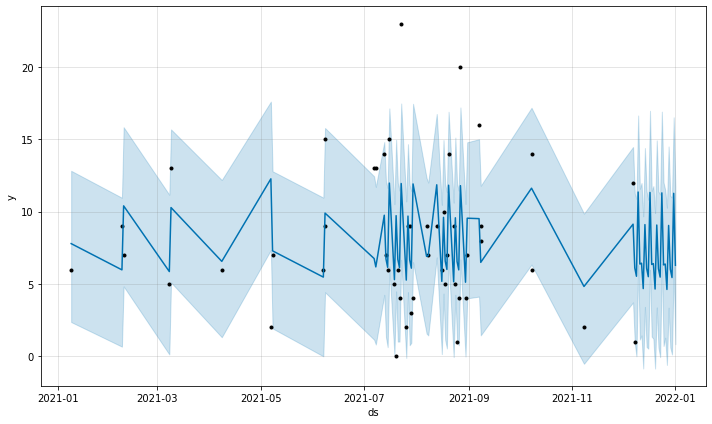

In [49]:
m.plot(forecast);

Los datos son los puntos negros, los del final son el futuro. La linea azul son el pronóstico, para ampliarlo ver la siguiente instrucción.

In [50]:
pd.plotting.register_matplotlib_converters()

(738095.0, 738156.0)

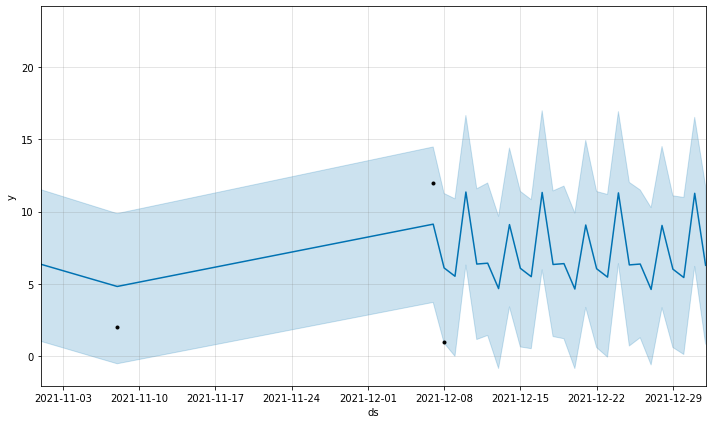

In [52]:
import matplotlib.pyplot as plt
m.plot(forecast)
plt.xlim('2021-11-01','2022-01-01')

Para graficar solamente la predicción:

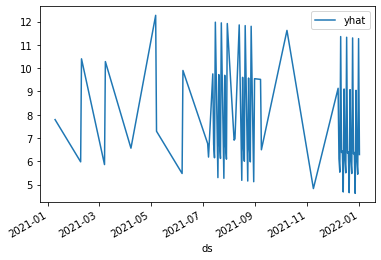

In [53]:
forecast.plot(x='ds',y='yhat')

Se dibuja el componente de tendencia, y componenete de tendencia anual hay un pico anual en Diciembre donde la gente tiende a comprar más alochol

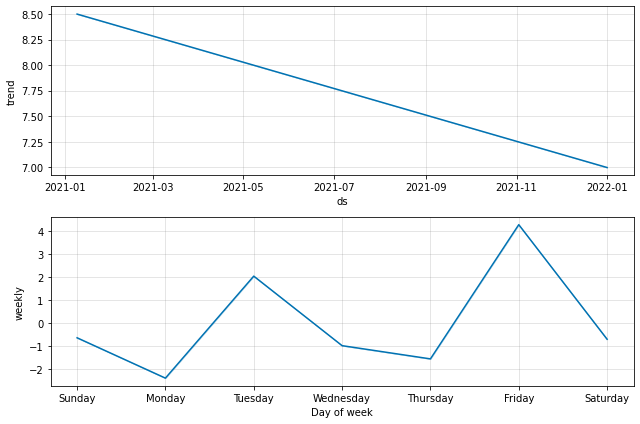

In [54]:
m.plot_components(forecast);
